## Python imports

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


## Read MNIST data (download if necessary)

In [2]:
mnist = input_data.read_data_sets('../data/', one_hot=True)

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


## Verify data shape

* Training set
* Validation set
* Test set

In [3]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [4]:
mnist.validation.images.shape, mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [5]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

## Configure neural network

* 784 input units
* 15 hidden units with sigmoid activation functions
* 10 softmax output units

In [6]:
model = models.Sequential()
model.add(layers.Dense(15, activation = 'sigmoid', input_shape = (28 * 28,)))
model.add(layers.Dense(10, activation = 'softmax'))

## Specify loss function and optimizer

* Categorical cross-entropy loss function
* RMSprop optimizer (learning rate is adapted for each parameter)

In [7]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Model summary

In [8]:
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


## Train the neural network

In [9]:
history = model.fit(mnist.train.images,
                    mnist.train.labels,
                    epochs = 20,
                    verbose = 2,
                    batch_size = 512,
                    validation_data = (mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
0s - loss: 1.7249 - acc: 0.5969 - val_loss: 1.3506 - val_acc: 0.7686
Epoch 2/20
0s - loss: 1.1608 - acc: 0.8111 - val_loss: 0.9696 - val_acc: 0.8492
Epoch 3/20
0s - loss: 0.8637 - acc: 0.8566 - val_loss: 0.7384 - val_acc: 0.8734
Epoch 4/20
0s - loss: 0.6772 - acc: 0.8745 - val_loss: 0.5896 - val_acc: 0.8862
Epoch 5/20
0s - loss: 0.5572 - acc: 0.8842 - val_loss: 0.4940 - val_acc: 0.8940
Epoch 6/20
0s - loss: 0.4776 - acc: 0.8916 - val_loss: 0.4305 - val_acc: 0.9014
Epoch 7/20
0s - loss: 0.4233 - acc: 0.8981 - val_loss: 0.3850 - val_acc: 0.9066
Epoch 8/20
0s - loss: 0.3850 - acc: 0.9035 - val_loss: 0.3537 - val_acc: 0.9114
Epoch 9/20
0s - loss: 0.3570 - acc: 0.9073 - val_loss: 0.3304 - val_acc: 0.9154
Epoch 10/20
0s - loss: 0.3353 - acc: 0.9112 - val_loss: 0.3125 - val_acc: 0.9174
Epoch 11/20
0s - loss: 0.3182 - acc: 0.9137 - val_loss: 0.2987 - val_acc: 0.9228
Epoch 12/20
0s - loss: 0.3044 - acc: 0.9170 - val_loss: 0.2877 - val_

## Plot accuracy, loss

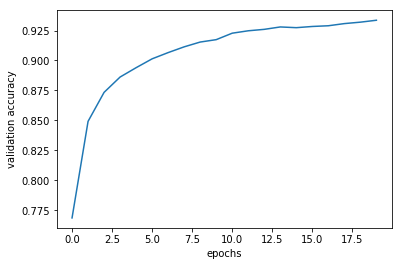

In [10]:
plt.plot(history.history['val_acc'])
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.show()

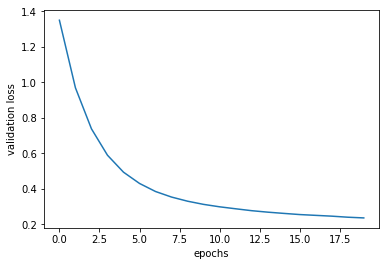

In [11]:
plt.plot(history.history['val_loss'])
plt.ylabel('validation loss')
plt.xlabel('epochs')
plt.show()

## Evaluate model accuracy on test data

In [12]:
test_loss, test_acc = model.evaluate(mnist.test.images, mnist.test.labels, verbose = 0)
print()
print("Test accuracy:")
test_acc


Test accuracy:


0.92930000000000001

## Compute predicted values and predicted probabilities in test data

In [13]:
y_pred = model.predict_classes(mnist.test.images, verbose = 0)
y_actual = mnist.test.labels.argmax(1)

digits = [str(i) for i in range(10)]

y_prob = model.predict(mnist.test.images)

## Diagnostic measures

In [14]:
print()
print("Classification report")
print(classification_report(y_actual, y_pred, target_names = digits))


Classification report
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.97      0.98      0.98      1135
          2       0.92      0.90      0.91      1032
          3       0.92      0.91      0.91      1010
          4       0.93      0.95      0.94       982
          5       0.90      0.88      0.89       892
          6       0.94      0.95      0.94       958
          7       0.93      0.93      0.93      1028
          8       0.89      0.89      0.89       974
          9       0.93      0.92      0.92      1009

avg / total       0.93      0.93      0.93     10000



## Confusion matrix

In [15]:
print()
print("Confusion matrix")
print(confusion_matrix(y_actual, y_pred))


Confusion matrix
[[ 958    0    2    1    0    5   11    2    1    0]
 [   0 1112    3    2    1    2    4    1   10    0]
 [   9    1  933   15   11    4   12   14   32    1]
 [   1    0   25  916    2   23    1   14   20    8]
 [   1    6    5    0  928    0    9    2    5   26]
 [   7    3    4   33    8  784   11    8   27    7]
 [   8    3   13    0    8   14  910    0    2    0]
 [   3    7   21    4    9    0    0  955    2   27]
 [   5    6   11   16    9   31   10   11  869    6]
 [  12    7    1   12   22    5    0   19    3  928]]


## Identify test examples where the model is wrong

In [16]:
errors = np.where(np.not_equal(y_actual, y_pred))
print()
print("Errors")
print(len(errors[0]))
# print(errors)


Errors
707


## Utility functions

In [17]:
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [18]:
def review(idx):
    img = mnist.test.images[idx]
    img = img.reshape((28, 28))
    show(img)
    print("Index: {}".format(idx))
    print("Predicted: {0}, Actual: {1}".format(y_pred[idx], y_actual[idx]))
    print("y_prob: {0}".format(np.array_str(y_prob[idx], precision = 2, suppress_small = True)))

## Look at some randomly selected errors

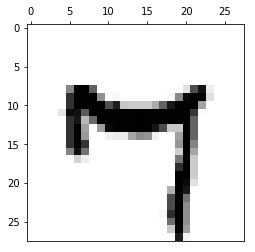

Index: 3836
Predicted: 9, Actual: 7
y_prob: [ 0.    0.    0.    0.    0.09  0.02  0.    0.14  0.02  0.73]


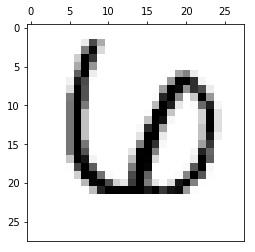

Index: 3846
Predicted: 2, Actual: 6
y_prob: [ 0.01  0.    0.73  0.01  0.01  0.    0.22  0.01  0.    0.  ]


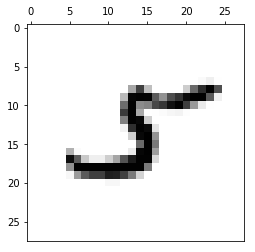

Index: 6775
Predicted: 8, Actual: 5
y_prob: [ 0.    0.04  0.05  0.    0.    0.1   0.    0.04  0.76  0.  ]


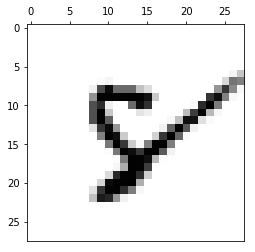

Index: 8279
Predicted: 5, Actual: 8
y_prob: [ 0.    0.01  0.01  0.    0.01  0.87  0.03  0.01  0.06  0.  ]


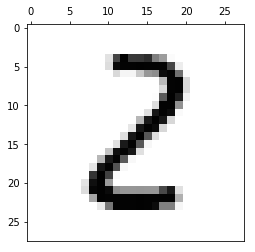

Index: 5217
Predicted: 8, Actual: 2
y_prob: [ 0.    0.01  0.16  0.03  0.    0.03  0.    0.    0.75  0.  ]


In [19]:
from random import sample
for i in sample(list(errors[0]), 5):
    review(i)